# K-Means Clustering

### Random 하게 생성된 toy dataset 으로 K-Means clustering test
--> 일단 우리가 이 모델이 잘 맞췄는지 못 맞췄는지를 알 수 있도록 toy dataset를 만들거임 (연습용 데이터)

make_blobs : 
```
    Input :
         n_samples :  cluster 에 균등 분할될 total data point 숫자  
         centers : generate 할 centroid 숫자  
         cluster_std : cluster 의 standard deviation    

    Output : 
        X: 생성된 sample 들  
        y: 각 sample 의 label
```
KMeans :  
> init : initialization method -> k-means++ (smart choosing of centroids)  
> n_clusters : k 값  
> n_init : 반복횟수  

DBSCAN :

>eps : epsilon (radius)  
>min_sample : minimum samples within the radius

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # make_blobs : 데이터 포인들을 임의로 만들어내는 함수 

In [5]:
np.random.seed(101) # 임의의 숫자를 똑같은 임의의 난수가 생김

In [6]:
centerLocation = [[3,2],[1,-1],[-1,2]] # 센터 위치를 임의로 정했

# 지금은 비지도 학습이니깐 x값만 필요, y자리는 언더바(_)
# 1500개의 데이터 포인터를 만들고 중심점은 centerLocation
X,_ = make_blobs(n_samples = 1500, centers = centerLocation)
X.shape # X,Y축 각각 1500개 X는 첫 번째 칼럼, Y는 두 번째 칼럼

(1500, 2)

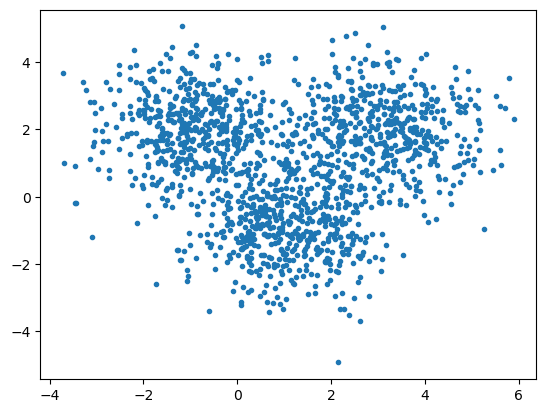

In [9]:
# 데이터 포인터 시각화 
# 3개의 중심점들을 가지고 인공적으로 우리가 만든 데이터들 
plt.scatter(X[:,0],X[:,1], marker=".")

In [10]:
# 3개로 군집화를 해보자
k_means = KMeans(n_clusters = 3)
k_means.fit(X)

C:\Users\esroh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [11]:
k_means?

Type:        KMeans
String form: KMeans(n_clusters=3)
File:        c:\users\esroh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from the vanilla 

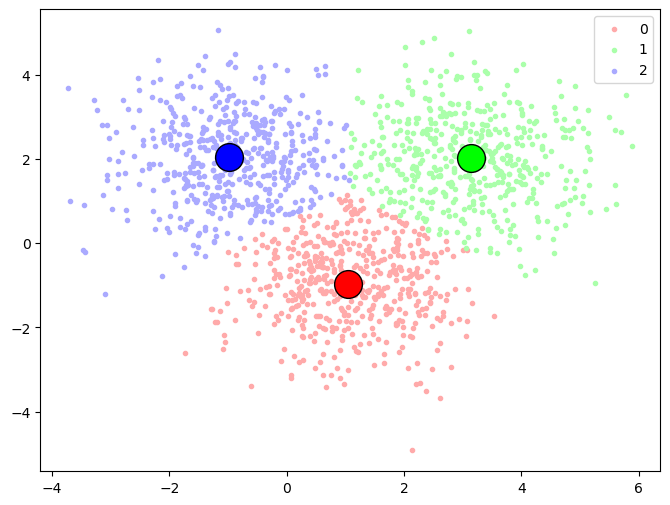

In [35]:
plt.figure(figsize=(8,6))
for i in range(3):
    plt.scatter(X[members==i,0], X[members == i,1],marker=".", color=colors_light(i),label=i)
    plt.plot(centers[i,0],centers[i,1],'o', markersize=20, color=colors_bold(i),markeredgecolor="k")
plt.legend()

# DBSCAN

- outlier 가 있는 data points를 생성하고 DBSCAN 알고리즘이 outlier를 검출하는지 test

In [64]:
from sklearn.cluster import DBSCAN

# 그냥 임의로 만들어본 데이터 포인터
X1,_ = make_blobs(n_samples=500, centers=[[-3,-3]])
X2,_ = make_blobs(n_samples=500, centers=[[3,3]])
X3 = np.random.rand(500,2) * 3 + 4
X4 = np.random.randn(10,2) * 3 # outlier

X1.shape, X2.shape, X3.shape, X4.shape

((500, 2), (500, 2), (500, 2), (10, 2))

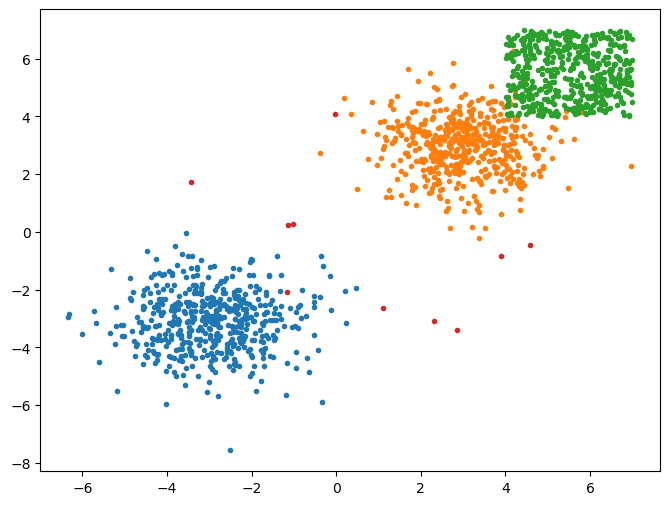

In [65]:
# 인공 데이터 시각화
plt.figure(figsize=(8,6))
plt.scatter(X1[:,0],X1[:,1], marker =".")
plt.scatter(X2[:,0],X2[:,1], marker =".")
plt.scatter(X3[:,0],X3[:,1], marker =".")
plt.scatter(X4[:,0],X4[:,1], marker =".")

In [66]:
X = np.vstack([X1,X2,X3,X4]) # X1~X4를 다 합쳤
X.shape

(1510, 2)

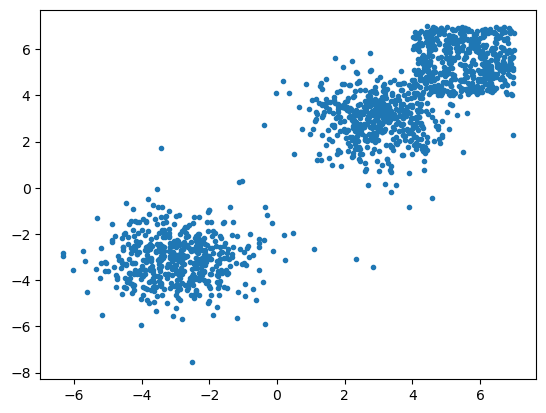

In [67]:
# 전체 데이터 시각화
# 이런 데이터를 줄 때 DBSCAN 알고리즘이 알아서 분류해라 
plt.scatter(X[:,0],X[:,1], marker=".") 

In [68]:
 # 중요한 파라미터 = eps (반경을 얼마나 할지), min_samples
DBSCAN?

Init signature:
DBSCAN(
    eps=0.5,
    *,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
)
Docstring:     
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
occur when the `eps` param is large and `min_samples` is low.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
    important DBSCAN parameter to choose appropriately for your data set
    and distance function.

min_s

In [69]:
db = DBSCAN(eps = 0.3, min_samples = 7)
db.fit(X)

DBSCAN(eps=0.3, min_samples=7)

In [70]:
db.labels_ # 몇 번째 데이터 포인트의 레이블이 무엇인지 나

array([ 0,  0,  0, ..., -1, -1, -1], dtype=int64)

In [71]:
labels = list(set(db.labels_)) # set에 넣으면 중복을 제거
labels

[0, 1, 2, 3, 4, -1]

In [72]:
np.arange(1,10,0.1) # 1에서 10사이를 0.1간격으로 만들어라 

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [73]:
np.linspace(1,10,100) # 1에서 10 사이의 간격을 100개로 나눠라 

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [76]:
colors = plt.cm.Spectral(np.linspace(0,1,len(labels))) 
# RGBA 뒤에 괄호만큼 컬러가 생성해주는데 맨 뒤는 투명도, red,green,blue,투명도로 이뤄짐
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.95686275, 0.42745098, 0.2627451 , 1.        ],
       [0.99607843, 0.87843137, 0.54509804, 1.        ],
       [0.90196078, 0.96078431, 0.59607843, 1.        ],
       [0.4       , 0.76078431, 0.64705882, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [77]:
list(zip(labels, colors)) # 0일때는 이 컬러, 1일땐 저 칼라 이렇게 지정해줌

[(0, array([0.61960784, 0.00392157, 0.25882353, 1.        ])),
 (1, array([0.95686275, 0.42745098, 0.2627451 , 1.        ])),
 (2, array([0.99607843, 0.87843137, 0.54509804, 1.        ])),
 (3, array([0.90196078, 0.96078431, 0.59607843, 1.        ])),
 (4, array([0.4       , 0.76078431, 0.64705882, 1.        ])),
 (-1, array([0.36862745, 0.30980392, 0.63529412, 1.        ]))]

Text(0.5, 1.0, 'DBSCAN')

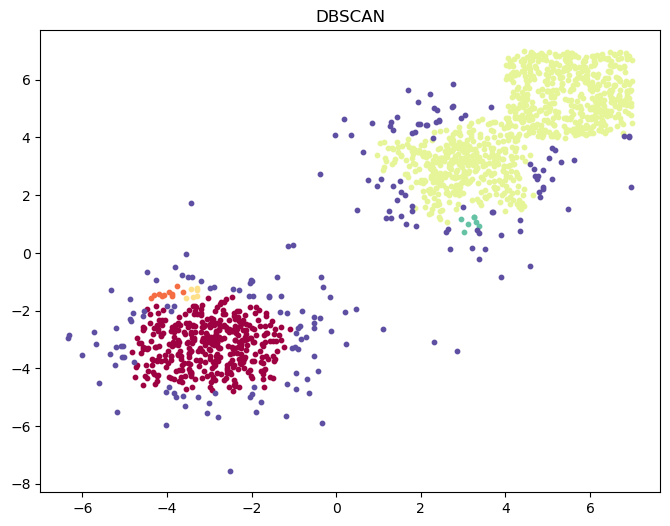

In [80]:
# DBSCAN 알고리즘에 의해서 이런 것들을 다 별개의 코어 또는 border포인트로 구분을 했음
plt.figure(figsize=(8,6))
for k, col in zip(labels,colors):
    members = (db.labels_== k) # k가 0,1,2,3,4,-1
    plt.scatter(X[members, 0], X[members, 1], color=col,marker="o",s=10)

plt.title("DBSCAN")